# Lender club case study


## Objective:
To help determine (driving factors behind) the potential defaulters among the loan applicants

In [1]:
#import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan.csv",low_memory=False)

## Data cleaning
### Fix columns

In [3]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\2728897127.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


#### Looks like a lot columns are having complete missing values.
#### All the 0 count non null cloumns shall be deleted. It is as good as non existent

In [4]:
f = lambda x:x.name if (x.isnull().sum() >= x.shape[0]) else 'Valid'

In [5]:
invalid_columns_name = df.apply(f)

In [6]:
invalid_columns_name

id                                                 Valid
member_id                                          Valid
loan_amnt                                          Valid
funded_amnt                                        Valid
funded_amnt_inv                                    Valid
                                         ...            
tax_liens                                          Valid
tot_hi_cred_lim                          tot_hi_cred_lim
total_bal_ex_mort                      total_bal_ex_mort
total_bc_limit                            total_bc_limit
total_il_high_credit_limit    total_il_high_credit_limit
Length: 111, dtype: object

In [7]:
df_clean = df.drop(columns=invalid_columns_name[:],errors='ignore')

In [8]:
df_clean.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\1282371255.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_clean.info(verbose=True,null_counts=True)


#### Some of the columns still contains a very high percentage missing values
#### Deleting the columns that contains more than 60% missing values

In [9]:
f = lambda x:x.name if (x.isnull().sum() >= 0.6* x.shape[0]) else 'Valid'

In [10]:
invalid_columns_name = df_clean.apply(f)

In [11]:
invalid_columns_name

id                                             Valid
member_id                                      Valid
loan_amnt                                      Valid
funded_amnt                                    Valid
funded_amnt_inv                                Valid
term                                           Valid
int_rate                                       Valid
installment                                    Valid
grade                                          Valid
sub_grade                                      Valid
emp_title                                      Valid
emp_length                                     Valid
home_ownership                                 Valid
annual_inc                                     Valid
verification_status                            Valid
issue_d                                        Valid
loan_status                                    Valid
pymnt_plan                                     Valid
url                                           

In [12]:
df_clean = df_clean.drop(columns=invalid_columns_name[:],errors='ignore')

In [13]:
df_clean.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\1282371255.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_clean.info(verbose=True,null_counts=True)


#### Every person describes the reason for the loan application differently and it is mostly difficult to find the pattern

In [14]:
df["desc"].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

#### URL column doesnt help the analysis. It contains only the web address via the loan application is submitted and it is always through the lending club portal

In [15]:
df_clean.drop(columns="url",inplace=True)

In [16]:
df_clean.info(verbose=True,null_counts=True)

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\1282371255.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_clean.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Lets look at any duplicate entries using IDs or member IDs

In [17]:
df_clean.id.duplicated().sum()

0

In [18]:
df_clean.member_id.duplicated().sum()

0

#### No duplicates found. These are unique IDs and doesn't help in anyways to acheive the objective. Lets drop them from the data frame

In [19]:
df_clean.drop(columns=["id","member_id"],inplace=True)

In [20]:
df_clean.shape

(39717, 51)

#### Does collection_recovery_fee column provide any useful information?

In [21]:
df_clean[df_clean["collection_recovery_fee"] > 0].loan_status.value_counts()

Charged Off    3782
Name: loan_status, dtype: int64

#### Values are plausible that collection fee > 0 is always defaulters . Post charge of collection recovery fee doesn't provide any information to find the indicators of defaulters as they are all defaulters. Droping this column as this is redundant information to loan status charged off category

In [22]:
df_clean.drop(columns="collection_recovery_fee",inplace=True)

In [23]:
df_clean.shape

(39717, 50)

In [24]:
#### Does collections_12_mths_ex_med column provude any useful information?

In [25]:
df_clean.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

#### Since all the values are 0 or may be NA, do information can be extracted. Hence it will be droped from the data set

In [26]:
df_clean.drop(columns="collections_12_mths_ex_med", inplace=True)

#### Does tax_liens column provide any relevant indications?

In [27]:
df_clean["tax_liens"].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

#### Data is all 0, entire column will be droped

In [28]:
df_clean.drop(columns="tax_liens",inplace=True)

In [29]:
df_clean.shape

(39717, 48)

In [30]:
df_clean.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [31]:
df_clean["emp_title"].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

# Add comments about why the prio 2 variables are not considered for analysis by end of 08/07/2022

## Univariate analysis

#### annual_inc
Income of the accepted loan applicant cannot be 0 or high value. Data spread of the income can be checked to know the data

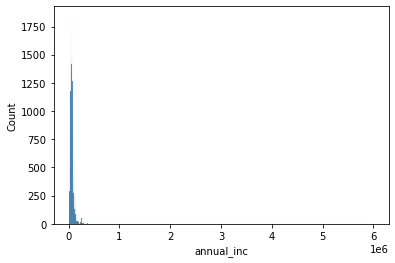

In [32]:
sns.histplot(df_clean["annual_inc"])
plt.show()

#### seems certain outliers in the data. Lets check the quartiles

In [33]:
df_clean["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### All looks valid values. Person with 600K annual salary wouldnt need loan generally. Considering the median as 59K, 600K seems very high. Lets look at the data distribution for salaries less than 200K

In [34]:
df_clean[df_clean["annual_inc"] <=200000].annual_inc.describe()

count     39131.000000
mean      64799.418496
std       33700.473800
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80004.000000
max      200000.000000
Name: annual_inc, dtype: float64

D:\04_Personal\UpGrad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


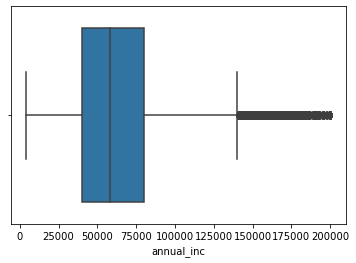

In [35]:
sns.boxplot(df_clean[df_clean["annual_inc"] <=200000].annual_inc)
plt.show()

#### Looks like we can ignore the entries with annual income > 200 K. Before that lets understand the loan amount issued for the applicants of higher salary

In [36]:
df_clean[df_clean["annual_inc"] >200000].loan_amnt.describe()

count      586.000000
mean     19370.776451
std       9683.917646
min       1000.000000
25%      12000.000000
50%      20000.000000
75%      25000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### This is not clearly conclusive evidence to remove data. Lets keep them for now

#### delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [37]:
df_clean["delinq_2yrs"].describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

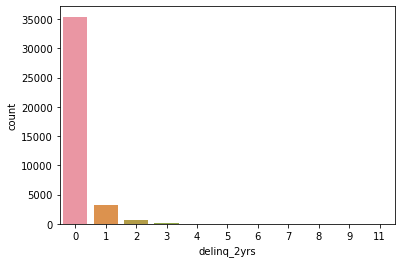

In [38]:
sns.countplot(x = df_clean["delinq_2yrs"])
plt.show()

#### Lot of no delinquencies in the data, very few applicants have delinquinted 1 time in the last 2 years

#### delinq_amnt --> The past-due amount owed for the accounts on which the borrower is now delinquent.

In [39]:
df_clean["delinq_amnt"].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

#### This columns is not filled in the data capture process by LC. No use and hecne shall be dropped from the data frame

In [40]:
df_clean.drop(columns = "delinq_amnt", inplace = True)

In [41]:
df_clean.shape

(39717, 47)

#### dti (debt to income ratio) --> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [42]:
df_clean["dti"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: dti
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [43]:
df_clean["dti"].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

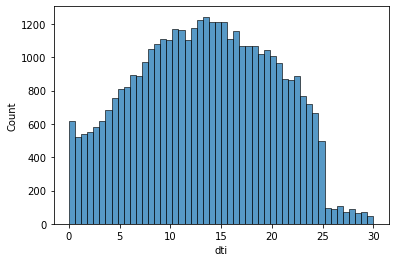

In [44]:
sns.histplot(x = df_clean["dti"])
plt.show()

#### dti can be 0 when the numerator or denominator is 0. Denominator cannot be 0 (mathematically this leads the infinity) as the loan would not have been processed without any income. Therefore if it is 0, then there must not have been any non mortage loan for that account

#### Data seems to have normal distribution except after ratio of 25.
question? ==> How the ratio be more than 1. This means his monthy debt on existing accounts is more than his income

#### earliest_cr_line --> The month the borrower's earliest reported credit line was opened

In [45]:
df_clean["earliest_cr_line"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: earliest_cr_line
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [46]:
df_clean["earliest_cr_line"].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

Make generic code later for the below section

In [47]:
def formating_date(x):
    for idx,char in enumerate(x):
        if char == '-':
            if int(x[idx+1:]) < 22:
                return ["20"+ x[idx+1:], x[:idx]]
            else:
                return ["19"+ x[idx+1:], x[:idx]]

In [48]:
year, month = formating_date('jan-85')

In [49]:
year

'1985'

In [50]:
month

'jan'

In [51]:
df_clean["earliest_cr_line_year"] =  df_clean["earliest_cr_line"].apply(formating_date).str[0]

In [52]:
df_clean["earliest_cr_line_mon"] =  df_clean["earliest_cr_line"].apply(formating_date).str[1]

In [53]:
df_clean["earliest_cr_line_mon"]

0        Jan
1        Apr
2        Nov
3        Feb
4        Jan
        ... 
39712    Nov
39713    Dec
39714    Oct
39715    Nov
39716    Oct
Name: earliest_cr_line_mon, Length: 39717, dtype: object

In [54]:
df_clean["earliest_cr_line_year"]

0        1985
1        1999
2        2001
3        1996
4        1996
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_year, Length: 39717, dtype: object

#### emp_length --> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

In [55]:
df_clean["emp_length"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [56]:
df_clean["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

D:\04_Personal\UpGrad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


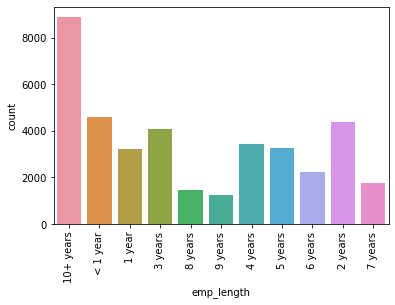

In [57]:
sns.countplot(df_clean["emp_length"])
plt.xticks(rotation=90)
plt.show()

#### emp_title --> The job title supplied by the Borrower when applying for the loan.*

In [58]:
df_clean["emp_title"].value_counts().head(50)

US Army                           134
Bank of America                   109
IBM                                66
AT&T                               59
Kaiser Permanente                  56
Wells Fargo                        54
USAF                               54
UPS                                53
US Air Force                       52
Walmart                            45
Lockheed Martin                    44
United States Air Force            42
State of California                42
U.S. Army                          41
Verizon Wireless                   40
Self Employed                      40
USPS                               39
US ARMY                            39
Walgreens                          38
JP Morgan Chase                    37
JPMorgan Chase                     36
Department of Defense              36
Target                             35
US Navy                            35
Self                               35
Booz Allen Hamilton                34
Northrop Gru

In [59]:
import copy
df_temp = copy.deepcopy(df_clean)

In [60]:
df_temp.emp_title[df_temp["emp_title"].isin(['US Army',"U.S. Army","US ARMY","us army","United States Army"])] = "US Army"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\2392145000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(['US Army',"U.S. Army","US ARMY","us army","United States Army"])] = "US Army"


In [61]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
Bank of America                    109
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
USAF                                54
UPS                                 53
US Air Force                        52
Walmart                             45
Lockheed Martin                     44
United States Air Force             42
State of California                 42
Verizon Wireless                    40
Self Employed                       40
USPS                                39
Walgreens                           38
JP Morgan Chase                     37
Department of Defense               36
JPMorgan Chase                      36
Target                              35
US Navy                             35
Self                                35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Verizon                  

In [62]:
df_temp.emp_title[df_temp["emp_title"].isin(['USAF',"US Air Force","United States Air Force","us army"])] = "US Air Force"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\686444642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(['USAF',"US Air Force","United States Air Force","us army"])] = "US Air Force"


In [63]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
UPS                                 53
Walmart                             45
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
USPS                                39
Walgreens                           38
JP Morgan Chase                     37
Department of Defense               36
JPMorgan Chase                      36
Target                              35
Self                                35
US Navy                             35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Verizon                             33
Best Buy                            32
Comcast                  

In [64]:
df_temp.emp_title[df_temp["emp_title"].isin(["JP Morgan Chase","JPMorgan Chase"])] = "JP Morgan Chase"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\2367621739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(["JP Morgan Chase","JPMorgan Chase"])] = "JP Morgan Chase"


In [65]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
JP Morgan Chase                     73
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
UPS                                 53
Walmart                             45
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
USPS                                39
Walgreens                           38
Department of Defense               36
Target                              35
US Navy                             35
Self                                35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Verizon                             33
Best Buy                            32
Comcast                             31
Accenture                

In [66]:
df_temp.emp_title[df_temp["emp_title"].isin(["UPS","United Parcel Service"])] = "UPS"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\1891788756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(["UPS","United Parcel Service"])] = "UPS"


In [67]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
UPS                                 81
JP Morgan Chase                     73
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
Walmart                             45
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
USPS                                39
Walgreens                           38
Department of Defense               36
Target                              35
Self                                35
US Navy                             35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Verizon                             33
Best Buy                            32
Comcast                             31
Accenture                

In [68]:
df_temp.emp_title[df_temp["emp_title"].isin(["United States Postal Service","USPS","US Postal Service","usps"])] = "USPS"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\3955476891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(["United States Postal Service","USPS","US Postal Service","usps"])] = "USPS"


In [69]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
USPS                               109
Bank of America                    109
UPS                                 81
JP Morgan Chase                     73
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
Walmart                             45
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
Walgreens                           38
Department of Defense               36
Target                              35
US Navy                             35
Self                                35
Northrop Grumman                    34
Booz Allen Hamilton                 34
Verizon                             33
Best Buy                            32
Comcast                             31
Accenture                

In [70]:
df_temp.emp_title[df_temp["emp_title"].isin(["Walmart","walmart"])] = "Walmart"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\3599209681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(["Walmart","walmart"])] = "Walmart"


In [71]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
USPS                               109
UPS                                 81
JP Morgan Chase                     73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
Walgreens                           38
Department of Defense               36
US Navy                             35
Self                                35
Target                              35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Verizon                             33
Best Buy                            32
Comcast                             31
Fidelity Investments     

In [72]:
df_temp.emp_title[df_temp["emp_title"].isin(["United States Navy","US Navy"])] = "US Navy"

C:\Users\Vivek Prahlada\AppData\Local\Temp\ipykernel_14448\156580220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.emp_title[df_temp["emp_title"].isin(["United States Navy","US Navy"])] = "US Navy"


In [73]:
df_temp.emp_title.value_counts().head(50)

US Army                            277
US Air Force                       148
Bank of America                    109
USPS                               109
UPS                                 81
JP Morgan Chase                     73
Walmart                             70
IBM                                 66
AT&T                                59
Kaiser Permanente                   56
Wells Fargo                         54
US Navy                             52
Lockheed Martin                     44
State of California                 42
Verizon Wireless                    40
Self Employed                       40
Walgreens                           38
Department of Defense               36
Target                              35
Self                                35
Booz Allen Hamilton                 34
Northrop Grumman                    34
Verizon                             33
Best Buy                            32
Comcast                             31
Accenture                

#### home_ownership --> The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER

In [74]:
df_clean["home_ownership"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: home_ownership
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [75]:
df_clean["home_ownership"].head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

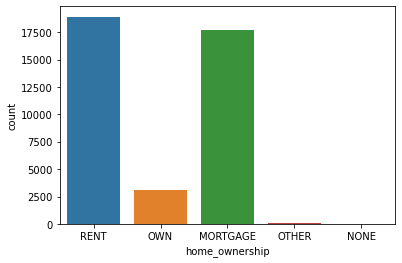

In [76]:
sns.countplot(x = df_clean["home_ownership"])
plt.show()

Note: Others and none might not give many information

#### inq_last_6mths --> The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [77]:
df_clean["inq_last_6mths"].describe()

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

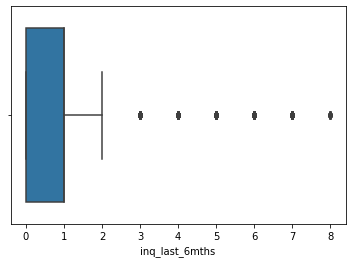

In [78]:
sns.boxplot(x = df_clean["inq_last_6mths"])
plt.show()

Since the values are only between 0 and 8 in whole data set. This can be used as categorical value and plot the loan status per categoty to understand the pattern. Scatter plot or line plot wouldnt help but a count plot does

#### loan_amnt --> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [79]:
df_clean["loan_amnt"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: loan_amnt
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [80]:
df_clean["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

(array([5033., 9891., 8108., 5121., 4155., 3166., 1228., 1733.,  489.,
         793.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

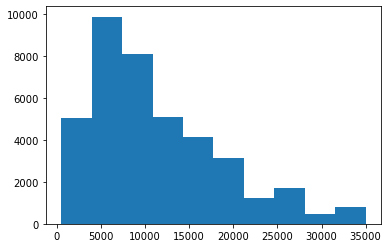

In [81]:
plt.hist(df_clean["loan_amnt"])

No outliers. Loans < 15000 are higher in number

#### open_acc --> The number of open credit lines in the borrower's credit file.

In [82]:
df_clean["open_acc"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: open_acc
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [83]:
df_clean["open_acc"].describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

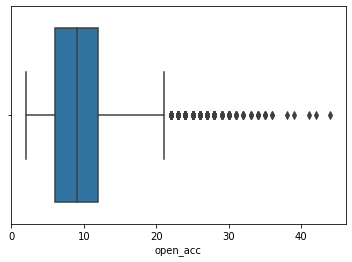

In [84]:
sns.boxplot(x=df_clean["open_acc"])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

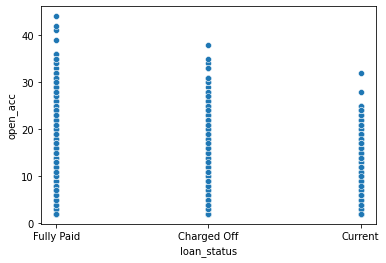

In [85]:
sns.scatterplot(x=df_clean["loan_status"],y=df_clean["open_acc"])

In [86]:
df_clean.loan_status[df_clean["open_acc"] > 30].value_counts()

Fully Paid     21
Charged Off     8
Current         1
Name: loan_status, dtype: int64

In [87]:
df_clean.loan_status[df_clean["open_acc"] > 10].value_counts()

Fully Paid     11003
Charged Off     1824
Current          425
Name: loan_status, dtype: int64

Category from the number of open accounts can be made to check the defaulters

#### total_acc --> The total number of credit lines currently in the borrower's credit file

In [88]:
df_clean["open_acc"].corr(df_clean["total_acc"])

0.6866347211191632

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

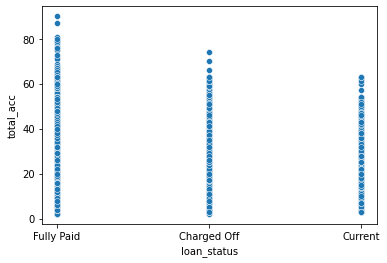

In [89]:
sns.scatterplot(x=df_clean["loan_status"],y=df_clean["total_acc"])

In [90]:
df_clean.loan_status[df_clean["total_acc"] > 30].value_counts()

Fully Paid     7035
Charged Off    1149
Current         268
Name: loan_status, dtype: int64

#### pub_rec --> Number of derogatory public records

In [91]:
df_clean["pub_rec"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [92]:
df_clean["pub_rec"].describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [93]:
df_clean["pub_rec"].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

Since the public records are very less between 2 and 3 value, both can be conbimed to make in total three categories --> No record, single record, multiple record

#### pub_rec_bankruptcies --> Number of public record bankruptcies

In [94]:
df_clean["pub_rec_bankruptcies"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39020 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [95]:
df_clean["pub_rec_bankruptcies"].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [96]:
df_clean["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Two cateogories can be made --> No record, record

#### purpose --> A category provided by the borrower for the loan request. 

In [97]:
df_clean["purpose"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: purpose
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [98]:
df_clean["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

Good categorical variable

In [99]:
?sns.countplot

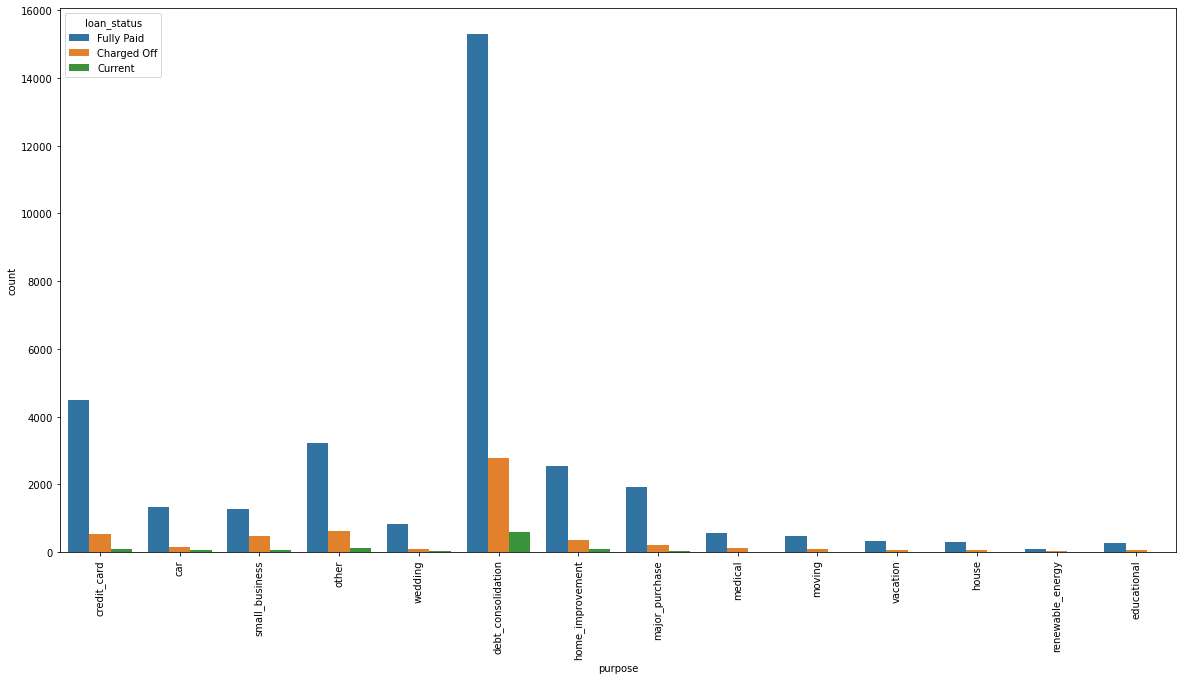

In [100]:
plt.figure(figsize=(20,10))
sns.countplot(hue=df_clean["loan_status"],x=df_clean["purpose"])
plt.xticks(rotation=90)
plt.show()

#### pymnt_plan --> Indicates if a payment plan has been put in place for the loan

In [101]:
df_clean["pymnt_plan"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pymnt_plan
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [102]:
df_clean["pymnt_plan"].describe()

count     39717
unique        1
top           n
freq      39717
Name: pymnt_plan, dtype: object

In [103]:
df_clean["pymnt_plan"].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

This column is not useful and hence shall be dropped

In [104]:
df_clean.drop(columns="pymnt_plan",inplace=True)

In [105]:
df_clean.shape

(39717, 48)

#### revol_bal --> Total credit revolving balance

In [106]:
df_clean["revol_bal"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: revol_bal
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [107]:
df_clean["revol_bal"].describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

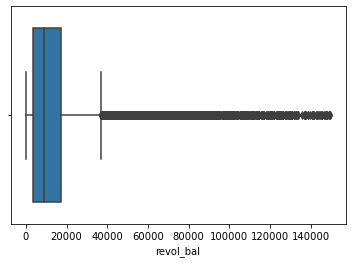

In [108]:
sns.boxplot(x=df_clean["revol_bal"])
plt.show()

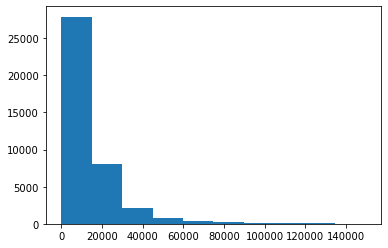

In [109]:
plt.hist(df_clean["revol_bal"])
plt.show()

Looks like there are outliers, effect of these outliers on the analysis is not known. I plan to keep it at this moment

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

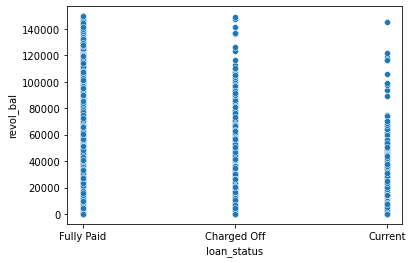

In [110]:
sns.scatterplot(x=df_clean["loan_status"],y=df_clean["revol_bal"])

categoties of different revolving balance range can be made

#### revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [111]:
df_clean["revol_util"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
39667 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [112]:
df_clean["revol_util"].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [113]:
df_clean["revol_util"].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

Removal of % char int the column to make it numerical

In [114]:
df_clean = df_clean[~(df_clean["funded_amnt_inv"] ==  6592.91596)]

In [115]:
df_clean["revol_util"] = df_clean["revol_util"].astype(str).apply(lambda x:x[0:-1])

Since the NA values are less it is imputed with the mode value of the data

In [116]:
df_clean["revol_util"] = df_clean["revol_util"].apply(lambda x: 0.0 if x=='na' else float(x))

In [117]:
df_clean["revol_util"].describe()

count    39716.000000
mean        48.771258
std         28.367810
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

#### sub_grade --> LC assigned loan subgrade

In [118]:
df_clean["sub_grade"].info()

<class 'pandas.core.series.Series'>
Int64Index: 39716 entries, 0 to 39716
Series name: sub_grade
Non-Null Count  Dtype 
--------------  ----- 
39716 non-null  object
dtypes: object(1)
memory usage: 620.6+ KB


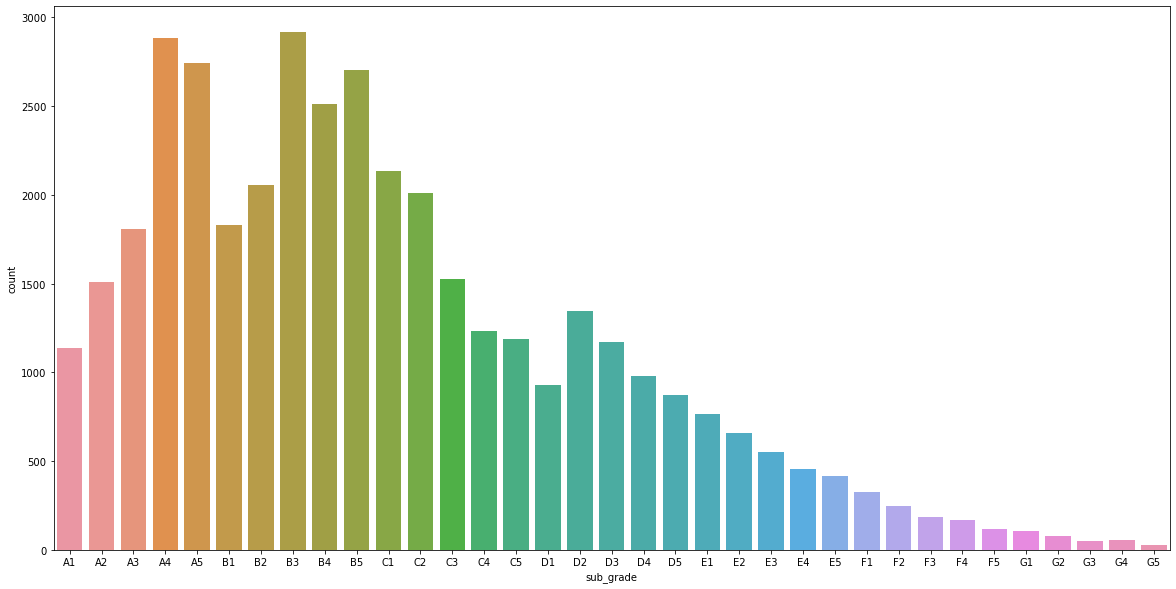

In [119]:
order=["A1","A2","A3","A4","A5",
      "B1","B2","B3","B4","B5",
      "C1","C2","C3","C4","C5",
      "D1","D2","D3","D4","D5",
      "E1","E2","E3","E4","E5",
      "F1","F2","F3","F4","F5",
      "G1","G2","G3","G4","G5"]
plt.figure(figsize=(20,10))
sns.countplot(x=df_clean["sub_grade"],order=order)
plt.show()

No outliers, Good categorical variable for bi-variate analysis

#### term --> The number of payments on the loan. Values are in months and can be either 36 or 60.

In [120]:
df_clean["term"].info()

<class 'pandas.core.series.Series'>
Int64Index: 39716 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype 
--------------  ----- 
39716 non-null  object
dtypes: object(1)
memory usage: 620.6+ KB


In [121]:
df_clean["term"].value_counts()

 36 months    29095
 60 months    10621
Name: term, dtype: int64

No further analysis is required for this variable in unvariate analysis

#### verification_status --> Indicates if income was verified by LC, not verified, or if the income source was verified

In [122]:
df_clean["verification_status"].info()

<class 'pandas.core.series.Series'>
Int64Index: 39716 entries, 0 to 39716
Series name: verification_status
Non-Null Count  Dtype 
--------------  ----- 
39716 non-null  object
dtypes: object(1)
memory usage: 620.6+ KB


In [123]:
df_clean["verification_status"].describe()

count            39716
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object

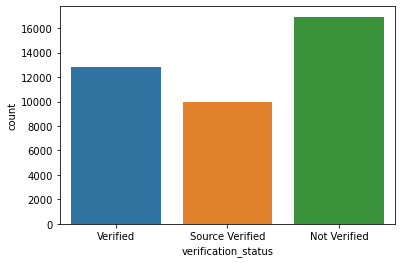

In [124]:
sns.countplot(x=df_clean["verification_status"])
plt.show()

## Bi-variate analysis

Since all the target variable is "loan_status", focus will be to understand the other dimension of the data against loan_status

#### annual_inc vs loan_status

From univariate analysis of annual_inc : It is a continuous variable and cannot be directly compared with categorical loan_status variable. Hence categories of annual income can be made first before comparison
L, M, H & VH categories can be made. Range of the variable is ~ 40k till 600k, with 75 percentile around 82k, below rages are assigned to categories

<= 25 percentile --> L

<= 50 and > 25 percentile --> M

<= 75 and > 50 percentile --> H

<= 100 and > 75 percentile --> VH

Assumption: With this approach of categorization, all the category will have roughly same numer of data points which may make the analysis easier

In [125]:
df_clean["annual_inc_group"] = df_clean["annual_inc"].astype(str)

In [126]:
df_clean.loc[df_clean["annual_inc"] <= df_clean["annual_inc"].quantile(0.25),"annual_inc_group"] = "L"

In [128]:
df_clean.loc[((df_clean["annual_inc"] > df_clean["annual_inc"].quantile(0.25)) & 
             (df_clean["annual_inc"] <= df_clean["annual_inc"].quantile(0.5))),"annual_inc_group"] = "M"

In [129]:
df_clean.loc[((df_clean["annual_inc"] > df_clean["annual_inc"].quantile(0.5)) & 
             (df_clean["annual_inc"] <= df_clean["annual_inc"].quantile(0.75))),"annual_inc_group"] = "H"

In [130]:
df_clean.loc[((df_clean["annual_inc"] > df_clean["annual_inc"].quantile(0.75)) & 
             (df_clean["annual_inc"] <= df_clean["annual_inc"].quantile(1))),"annual_inc_group"] = "VH"

In [132]:
df_clean["annual_inc_group"].value_counts()

M     9960
L     9929
VH    9929
H     9898
Name: annual_inc_group, dtype: int64

commarison of annual_inc_group vs loan_status

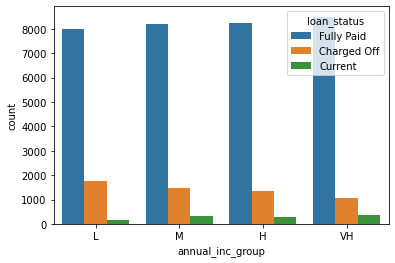

In [133]:
sns.countplot(x=df_clean["annual_inc_group"],hue=df_clean["loan_status"])
plt.show()

Good indication that lower the income group higher are the defaulters. Difficult to visualize in this plot, Lets ee the percentage of defaulters in the each iincome group

In [147]:
L = 100 * df_clean[((df_clean["annual_inc_group"] == 'L')&(df_clean["loan_status"] == "Charged Off"))].shape[0] / df_clean[(df_clean["annual_inc_group"] == 'L')].shape[0]
M = 100 * df_clean[((df_clean["annual_inc_group"] == 'M')&(df_clean["loan_status"] == "Charged Off"))].shape[0] / df_clean[(df_clean["annual_inc_group"] == 'M')].shape[0]
H = 100 * df_clean[((df_clean["annual_inc_group"] == 'H')&(df_clean["loan_status"] == "Charged Off"))].shape[0] / df_clean[(df_clean["annual_inc_group"] == 'H')].shape[0]
VH = 100 * df_clean[((df_clean["annual_inc_group"] == 'VH')&(df_clean["loan_status"] == "Charged Off"))].shape[0] / df_clean[(df_clean["annual_inc_group"] == 'VH')].shape[0]

In [148]:
print(L,M,H,VH)

17.705710544868566 14.598393574297189 13.588603758335017 10.776513244032632


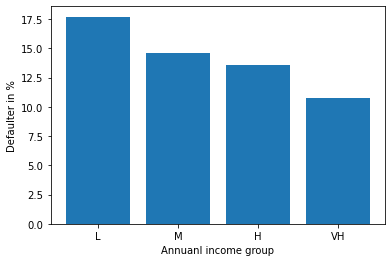

In [150]:
plt.bar(x=["L","M","H","VH"],height = [L,M,H,VH])
plt.ylabel("Defaulter in %")
plt.xlabel("Annuanl income group")
plt.show()

Lower income group applicants have 6% higher defaulting tendency compared to VH income group
Lower income group applicants have 3 to 4% higher defaulting tendency compared to M and H income groups